# Bank Customer Transaction Prediction

- Dataset: https://www.kaggle.com/c/santander-value-prediction-challenge/data

## 1. Load libs and data

In [61]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [62]:
# Importing the dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## 2. Overview

### Training Set

In [ ]:
print(train.info())
print("Rows and columns of training dataset:", train.shape)
# Check first 5 rows
print("First 5 rows of train dataset:\n", train.head(5))
# Check for missing values, only display columns with missing values
print("Columns with missing values:", train.columns[train.isnull().any()])

# Detect columns that contain all zero values
all_zero_columns_train = [col for col in train.columns if (train[col] == 0).all()]

print("Number of columns with all zero values:", len(all_zero_columns_train))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB
None
Rows and columns of training dataset: (4459, 4993)
First 5 rows of train dataset:
           ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115  ...  3ecc09859  9281abeea  \
0          0          0          0          0  ...        0.0        0.0   
1          0          0          0          0  ...        0.0        0.0   
2          0          0          0          0  ...        0.0       

### Test Set

In [ ]:
print(test.info())
print("Rows and columns of test dataset:", test.shape)
# Check first 5 rows
print("First 5 rows of test dataset:\n", test.head(5))
# Check for missing values, only display columns with missing values
print("Columns with missing values:", test.columns[test.isnull().any()])

# Detect columns that contain all zero values
all_zero_columns_test = [col for col in test.columns if (test[col] == 0).all()]

print("Number of columns with all zero values:", len(all_zero_columns_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB
None
Rows and columns of test dataset: (49342, 4992)
First 5 rows of test dataset:
           ID  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  \
0  000137c73        0.0        0.0        0.0        0.0        0.0   
1  00021489f        0.0        0.0        0.0        0.0        0.0   
2  0004d7953        0.0        0.0        0.0        0.0        0.0   
3  00056a333        0.0        0.0        0.0        0.0        0.0   
4  00056d8eb        0.0        0.0        0.0        0.0        0.0   

   30347e683  d08d1fbe3  6ee66e115  20aa07010  ...  3ecc09859  9281abeea  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0   

## 3. Feature Visualization

### Check the distribution of target

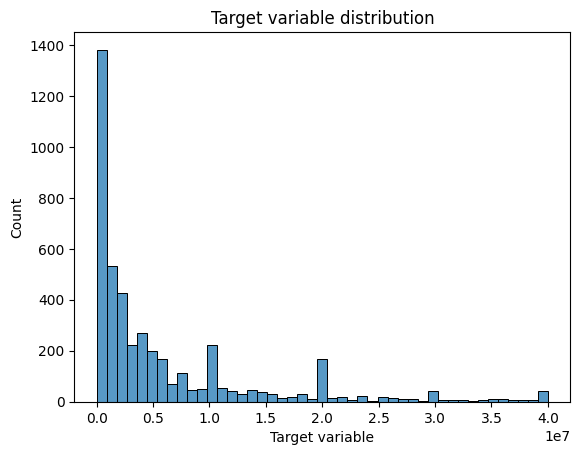

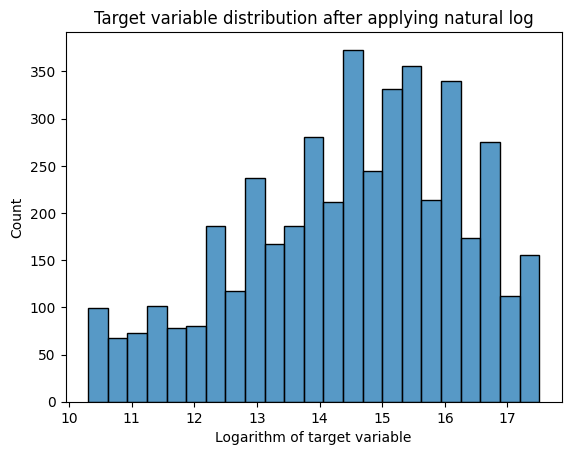

In [ ]:
# Visualize features to define the key features
# Split target and features
target = train['target']

# Target variable distribution use seaborn
sns.histplot(target)
plt.xlabel('Target variable')
plt.title('Target variable distribution')
plt.show()

# Apply nature log to target variable
target_processed = np.log1p(target)
sns.histplot(target_processed)
plt.xlabel('Logarithm of target variable')
plt.title('Target variable distribution after applying natural log')
plt.show()


### Check the correlation

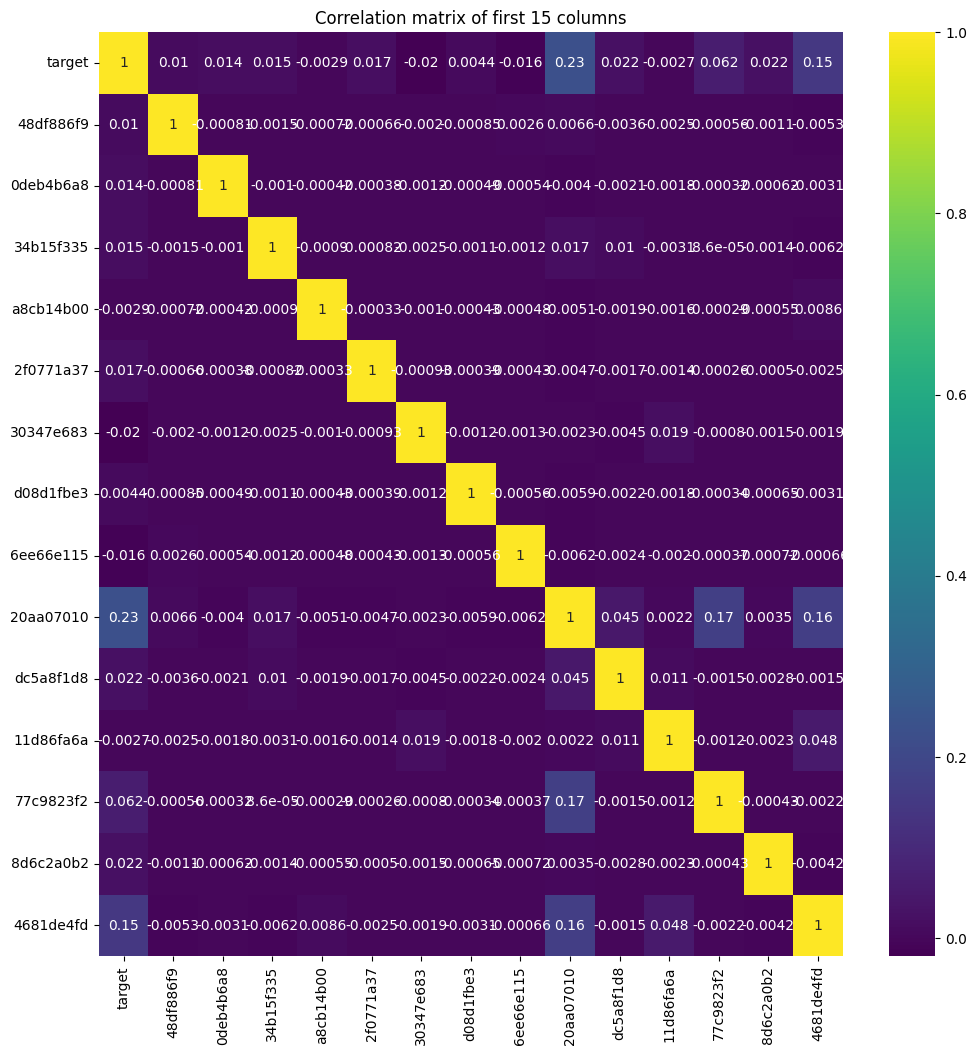

In [ ]:
# Remove non-numeric columns from train dataframe
numeric_train = train.select_dtypes(include=[np.number])

# Calculate correlation matrix for first 15 columns
correlation_matrix = numeric_train.iloc[:, :15].corr()

# Plot correlation matrix with light color
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation matrix of first 15 columns')
plt.show()

## 4. Feature Engineering

In [ ]:
# Handle constant features
# Remove columns with all zero values
train = train.drop(all_zero_columns_train, axis=1)

print("Rows and columns of training dataset after removing constant columns:", train.shape)

# Handle duplicate features

# Feature construction if needed

KeyError: "['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a742107', '08b9ec4ae', 'd95203ded', '58ad51def', '9f69ae59f', '863de8a31', 'be10df47c', 'f006d9618', 'a7e39d23d', '5ed0abe85', '6c578fe94', '7fa4fcee9', '5e0571f07', 'fd5659511', 'e06b9f40f', 'c506599c8', '99de8c2dc', 'b05f4b229', '5e0834175', 'eb1cc0d9c', 'b281a62b9', '00fcf67e4', 'e37b65992', '2308e2b29', 'c342e8709', '708471ebf', 'f614aac15', '15ecf7b68', '3bfe540f1', '7a0d98f3c', 'e642315a5', 'c16d456a7', '0c9b5bcfa', 'b778ab129', '2ace87cdd', '697a566f0', '97b1f84fc', '34eff114b', '5281333d7', 'c89f3ba7e', 'cd6d3c7e6', 'fc7c8f2e8', 'abbbf9f82', '24a233e8f', '8e26b560e', 'a28ac1049', '504502ce1', 'd9a8615f3', '4efd6d283', '34cc56e83', '93e98252a', '2b6cef19e', 'c7f70a49b', '0d29ab7eb', 'e4a0d39b7', 'a4d1a8409', 'bc694fc8f', '3a36fc3a2', '4ffba44d3', '9bfdec4bc', '66a866d2f', 'f941e9df7', 'e7af4dbf3', 'dc9a54a3e', '748168a04', 'bba8ce4bb', 'ff6f62aa4', 'b06fe66ba', 'ae87ebc42', 'f26589e57', '963bb53b1', 'a531a4bf0', '9fc79985d', '9350d55c1', 'de06e884c', 'fc10bdf18', 'e0907e883', 'c586d79a1', 'e15e1513d', 'a06067897', '643e42fcb', '217cd3838', '047ebc242', '9b6ce40cf', '3b2c972b3', '17a7bf25a', 'c9028d46b', '9e0473c91', '6b041d374', '783c50218', '19122191d', 'ce573744f', '1c4ea481e', 'fbd6e0a0b', '69831c049', 'b87e3036b', '54ba515ee', 'a09ba0b15', '90f77ec55', 'fb02ef0ea', '3b0cccd29', 'fe9ed417c', '589e8bd6f', '17b5a03fd', '80e16b49a', 'a3d5c2c2a', '1bd3a4e92', '611d81daa', '3d7780b1c', '113fd0206', '5e5894826', 'cb36204f9', 'bc4e3d600', 'c66e2deb0', 'c25851298', 'a7f6de992', '3f93a3272', 'c1b95c2ec', '6bda21fee', '4a64e56e7', '943743753', '20854f8bf', 'ac2e428a9', '5ee7de0be', '316423a21', '2e52b0c6a', '8bdf6bc7e', '8f523faf2', '4758340d5', '8411096ec', '9678b95b7', 'a185e35cc', 'fa980a778', 'c8d90f7d7', '080540c81', '32591c8b4', '5779da33c', 'bb425b41e', '01599af81', '1654ab770', 'd334a588e', 'b4353599c', '51b53eaec', '2cc0fbc52', '45ffef194', 'c15ac04ee', '5b055c8ea', 'd0466eb58', 'a80633823', 'a117a5409', '7ddac276f', '8c32df8b3', 'e5649663e', '6c16efbb8', '9118fd5ca', 'ca8d565f1', '16a5bb8d2', 'fd6347461', 'f5179fb9c', '97428b646', 'f684b0a96', 'e4b2caa9f', '2c2d9f267', '96eb14eaf', 'cb2cb460c', '86f843927', 'ecd16fc60', '801c6dc8e', 'f859a25b8', 'ae846f332', '2252c7403', 'fb9e07326', 'd196ca1fd', 'a8e562e8e', 'eb6bb7ce1', '5beff147e', '52b347cdc', '4600aadcf', '6fa0b9dab', '43d70cc4d', '408021ef8', 'e29d22b59'] not found in axis"

## 5. Build Model

In [ ]:
# XGBoost is suggested for this dataset

## 6. Test Model

## 7. Key Metrics and Conclusion

In [ ]:
# Key metrics to evaluate the model
# For XGBRegressor, we can use RMSE, MAE, R2